<a href="https://colab.research.google.com/github/K-Hebel/WiDS_Chi/blob/master/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Competion - Data Exploration
by Karen H.

# Load Libraries and DataSets

In [2]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [5]:
#@title
!pip install dabl
import dabl

     |████████████████████████████████| 573kB 5.2MB/s 
  Created wheel for dabl: filename=dabl-0.1.9-cp37-none-any.whl size=572789 sha256=bbd898fe295203903f577209a48cc1f54278b7ce8507d7f073295e40431ca89c
  Stored in directory: /root/.cache/pip/wheels/5c/cc/90/94172b7b3c03126e869bba34ed3852a617ddc6621ad1385697
Successfully built dabl


In [6]:
#@title
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khebel","key":"11c0f35aedbce6808a3f45f82709accf"}'}

In [7]:
#@title
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
#@title
! kaggle competitions download -c 'widsdatathon2021'

  0% 0.00/28.2k [00:00<?, ?B/s]
100% 28.2k/28.2k [00:00<00:00, 35.5MB/s]
 42% 9.00M/21.5M [00:00<00:01, 12.6MB/s]
100% 21.5M/21.5M [00:00<00:00, 26.0MB/s]
  0% 0.00/90.0k [00:00<?, ?B/s]
100% 90.0k/90.0k [00:00<00:00, 79.8MB/s]
  0% 0.00/1.60M [00:00<?, ?B/s]
100% 1.60M/1.60M [00:00<00:00, 50.5MB/s]
  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 57.7kB/s]


In [9]:
#@title
! unzip TrainingWiDS2021.csv.zip -d train

Archive:  TrainingWiDS2021.csv.zip
  inflating: train/TrainingWiDS2021.csv  


In [59]:

#@title
data_dict=pd.read_csv("DataDictionaryWiDS2021.csv")
df=pd.read_csv("train/TrainingWiDS2021.csv")


# Preview of training dataset (df) and data dictionary (data_dict)

In [36]:
df.head()

Unnamed: 0  encounter_id  hospital_id   age        bmi  elective_surgery  \
0           1        214826          118  68.0  22.732803                 0   
1           2        246060           81  77.0  27.421875                 0   
2           3        276985          118  25.0  31.952749                 0   
3           4        262220          118  81.0  22.635548                 1   
4           5        201746           33  19.0        NaN                 0   

   ethnicity gender  height hospital_admit_source           icu_admit_source  \
0  Caucasian      M   180.3                 Floor                      Floor   
1  Caucasian      F   160.0                 Floor                      Floor   
2  Caucasian      F   172.7  Emergency Department       Accident & Emergency   
3  Caucasian      F   165.1        Operating Room  Operating Room / Recovery   
4  Caucasian      M   188.0                   NaN       Accident & Emergency   

   icu_id icu_stay_type      icu_type  pre_icu_los_days  readmission_status  \
0      92         admit         CTICU          0.541667                   0   
1      90         admit  Med-Surg ICU          0.927778                   0   
2      93         admit  Med-Surg ICU          0.000694                   0   
3      92         admit         CTICU          0.000694                   0   
4      91         admit  Med-Surg ICU          0.073611                   0   

   weight  albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
0    73.9             2.3               113.0               502.01   
1    70.2             NaN               108.0               203.01   
2    95.3             NaN               122.0               703.03   
3    61.7             NaN               203.0              1206.03   
4     NaN             NaN               119.0               601.01   

   apache_post_operative  arf_apache  bilirubin_apache  bun_apache  \
0                      0           0               0.4        31.0   
1                      0           0               NaN         9.0   
2                      0           0               NaN         NaN   
3                      1           0               NaN         NaN   
4                      0           0               NaN         NaN   

   creatinine_apache  fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
0               2.51          NaN              3.0               6.0   
1               0.56          1.0              1.0               3.0   
2                NaN          NaN              3.0               6.0   
3                NaN          0.6              4.0               6.0   
4                NaN          NaN              NaN               NaN   

   gcs_unable_apache  gcs_verbal_apache  glucose_apache  heart_rate_apache  \
0                0.0                4.0           168.0              118.0   
1                0.0                1.0           145.0              120.0   
2                0.0                5.0             NaN              102.0   
3                0.0                5.0           185.0              114.0   
4                NaN                NaN             NaN               60.0   

   hematocrit_apache  intubated_apache  map_apache  paco2_apache  \
0               27.4                 0        40.0           NaN   
1               36.9                 0        46.0          37.0   
2                NaN                 0        68.0           NaN   
3               25.9                 1        60.0          30.0   
4                NaN                 0       103.0           NaN   

   paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
0                  NaN          NaN        NaN             36.0   
1                 37.0         51.0       7.45             33.0   
2                  NaN          NaN        NaN             37.0   
3                 30.0        142.0       7.39              4.0   
4                  NaN          NaN        NaN             16.0   

   sodium_apache

In [37]:
data_dict.head()

Category     Variable Name     Unit of Measure Data Type  \
0   identifier      encounter_id                None   integer   
1   identifier       hospital_id                None   integer   
2  demographic               age               Years   numeric   
3  demographic               bmi  kilograms/metres^2    string   
4  demographic  elective_surgery                None    binary   

                                                                           Description  \
0                                Unique identifier associated with a patient unit stay   
1                                         Unique identifier associated with a hospital   
2                                             The age of the patient on unit admission   
3                                  The body mass index of the person on unit admission   
4  Whether the patient was admitted to the hospital for an elective surgical operation   

  Example  
0    None  
1    None  
2    None  
3    21.5  
4       0

## Corr for the entire dataset to 'Diabetes_Mellitus'

In [114]:
cat_cols=list(df.select_dtypes('object'))
cat_cols

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

In [130]:
df_encode=pd.get_dummies(df[cat_cols])

In [131]:
df_encode = df.join(df_encode)
df_encode=df_encode.drop(cat_cols, axis=1)
df_encode.shape

(130157, 214)

In [132]:
df_encode=df_encode.drop(['bmi'], axis=1)

In [133]:
df_encode['bmi']=df_encode['weight']/(df_encode['height']/100)**2

In [134]:
df_encode=df_encode.drop(['weight', 'height'], axis=1)

In [135]:
sample_df=df_encode.groupby('diabetes_mellitus', group_keys=False).apply(lambda x: x.sample(25000, random_state=40))
sample_df=sample_df.drop(['Unnamed: 0'], axis=1)
sample_df.shape

(50000, 211)

In [136]:
matrix_pairs=sample_df.corr().unstack().sort_values(kind="quicksort")

In [137]:
diabetes_matrix_pairs= [(pair,matrix_pairs[pair]) for pair in matrix_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
full_corr=pd.DataFrame(diabetes_matrix_pairs, columns=['Feature_pair', 'Corr'])
zero_corr=list(full_corr[abs(full_corr['Corr'])<0.03]['Feature_pair'])
len(zero_corr)

119

In [138]:
drop_zero_corr=[]
for i in range(len(zero_corr)):
  drop_zero_corr.append(zero_corr[i][1])
drop_zero_corr

['icu_type_SICU',
 'd1_pao2fio2ratio_min',
 'd1_arterial_ph_min',
 'd1_resprate_min',
 'icu_id',
 'd1_pao2fio2ratio_max',
 'albumin_apache',
 'd1_albumin_min',
 'heart_rate_apache',
 'icu_admit_source_Operating Room / Recovery',
 'd1_sodium_max',
 'h1_mbp_min',
 'hospital_admit_source_Recovery Room',
 'h1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'solid_tumor_with_metastasis',
 'd1_albumin_max',
 'd1_diasbp_max',
 'h1_arterial_pco2_max',
 'ph_apache',
 'h1_mbp_noninvasive_min',
 'h1_mbp_invasive_max',
 'gcs_unable_apache',
 'apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_min',
 'aids',
 'd1_hco3_max',
 'icu_admit_source_Other Hospital',
 'h1_heartrate_max',
 'hospital_admit_source_Chest Pain Center',
 'hospital_admit_source_Other Hospital',
 'd1_temp_max',
 'immunosuppression',
 'apache_3j_diagnosis',
 'elective_surgery',
 'd1_lactate_max',
 'hospital_admit_source_PACU',
 'd1_arterial_pco2_max',
 'hospital_admit_source_ICU',
 'hospital_admit

In [139]:
sample_df=sample_df.drop(drop_zero_corr, axis=1)

In [140]:
sample_df.shape

(50000, 92)

In [142]:
sample_df.to_csv('alt_sample.csv', index=False)

!cp alt_sample.csv "drive/My Drive/"

## Initial Categories to Drop Based on Being Patient Vitals Agnostic



In [ ]:
drop_cat=['Unnamed: 0'	,'encounter_id','hospital_id','elective_surgery','icu_id',	'pre_icu_los_days',	'readmission_status',\
          'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type']

df=df.drop(drop_cat, axis=1)

In [ ]:
df.describe()

age            bmi         height         weight  \
count  125169.000000  125667.000000  128080.000000  126694.000000   
mean       61.995103      29.110260     169.607219      83.791104   
std        16.822880       8.262776      10.833085      24.963063   
min         0.000000      14.844926     137.200000      38.600000   
25%        52.000000      23.598006     162.500000      66.500000   
50%        64.000000      27.564749     170.100000      80.000000   
75%        75.000000      32.803127     177.800000      96.800000   
max        89.000000      67.814990     195.590000     186.000000   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    51994.000000       128472.000000        129292.000000   
mean         2.886149          185.492683           565.994296   
std          0.689812           85.858208           466.510850   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           204.010000   
50%          2.900000          122.000000           409.020000   
75%          3.400000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative     arf_apache  bilirubin_apache     bun_apache  \
count          130157.000000  130157.000000      47597.000000  104746.000000   
mean                0.207111       0.027997          1.201222      25.718070   
std                 0.405238       0.164965          2.351994      20.690041   
min                 0.000000       0.000000          0.100000       4.000000   
25%                 0.000000       0.000000          0.400000      13.000000   
50%                 0.000000       0.000000          0.700000      19.000000   
75%                 0.000000       0.000000          1.100000      31.000000   
max                 1.000000       1.000000         60.200000     127.000000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count      105275.000000  30437.000000    127967.000000     127967.000000   
mean            1.481629      0.595735         3.488290          5.484828   
std             1.543535      0.262922         0.939831          1.271039   
min             0.300000      0.210000         1.000000          1.000000   
25%             0.710000      0.400000         3.000000          6.000000   
50%             0.970000      0.500000         4.000000          6.000000   
75%             1.530000      0.850000         4.000000          6.000000   
max            11.180000      1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count      129448.000000      127967.000000   115461.000000   
mean            0.011441           4.030203      160.141416   
std             0.106349           1.538528       90.701327   
min             0.000000           1.000000       39.000000   
25%             0.000000           4.000000       97.000000   
50%             0.000000           5.000000      133.000000   
75%             0.000000           5.000000      195.000000   
max             1.000000           5.000000      598.700000   

       heart_rate_apache  hematocrit_apache  intubated_apache     map_apache  \
count      129848.000000      103399.000000     130157.000000  129737.000000   
mean           99.854530          32.975817          0.156626      87.193046   
std            30.759505           6.834576          0.363449      41.908109   
min            30.000000          16.200000          0.000000      40.000000   
25%            87.000000          28.000000          0.000000      54.000000   
50%           104.000000          33.100000          0.000000      66.000000   
75%           120.000000          37.900000          0.000000     124.000000   
max           178.000000          51.400000          1.000000     200.000000   

       paco2_apache  paco2_for_ph_apache   pao2_apache     ph_apache  \
count  30437.000000     

## Dictionary of  unique categories in data_dict and their corresponding df[column name]

In [ ]:
#Category Columns in Data_Dictionary
cat_col =list(data_dict['Category'].unique())
cat_col

['identifier',
 'demographic',
 'APACHE covariate',
 'vitals',
 'labs',
 'labs blood gas',
 'APACHE comorbidity',
 'Target Variable']

Create dictionary of all of the unique categories in data_dict and their corresponding variable name (df column name)

In [ ]:

cat_dict={}

for category in cat_col:
  cat_dict[category]= list(data_dict[data_dict['Category'].isin([category, 'Target Variable'])]['Variable Name'].values)


In [ ]:
#Training dataframe (df) Column Categories
identifier= [col for col in cat_dict['identifier'] if col in df.columns]
demographic= [col for col in cat_dict['demographic'] if col in df.columns]
APACHE_covariate= [col for col in cat_dict['APACHE covariate'] if col in df.columns]
vitals= [col for col in cat_dict['vitals'] if col in df.columns]
labs= [col for col in cat_dict['labs'] if col in df.columns]
labs_blood_gas= [col for col in cat_dict['labs blood gas'] if col in df.columns]
APACHE_comorbidity= [col for col in cat_dict['APACHE comorbidity'] if col in df.columns]

In [ ]:
demographic

['age', 'bmi', 'ethnicity', 'gender', 'height', 'weight', 'diabetes_mellitus']

#Stratified Random Sampling of DataSet to Balance Binary Target Variable Data

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 155 continuous features
Linear Discriminant Analysis training set score: 0.631


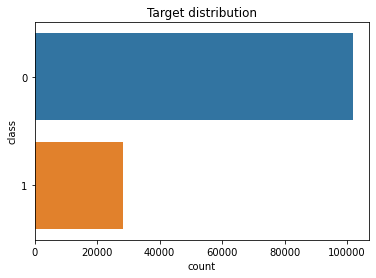

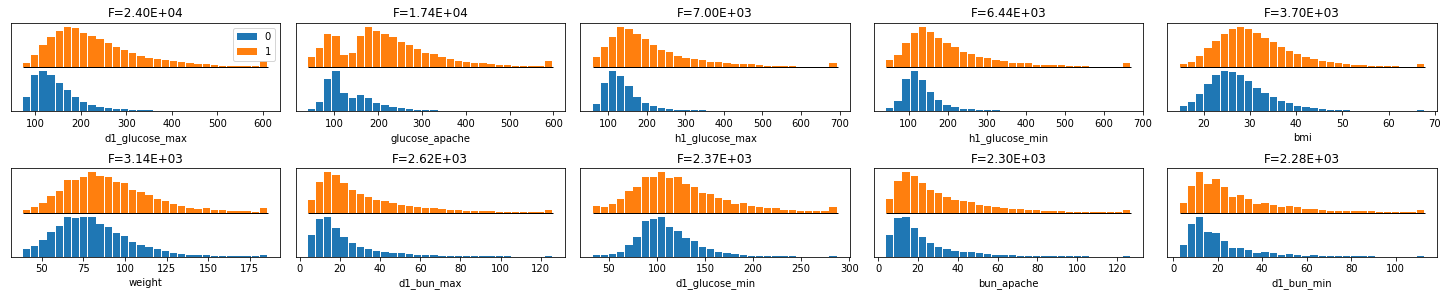

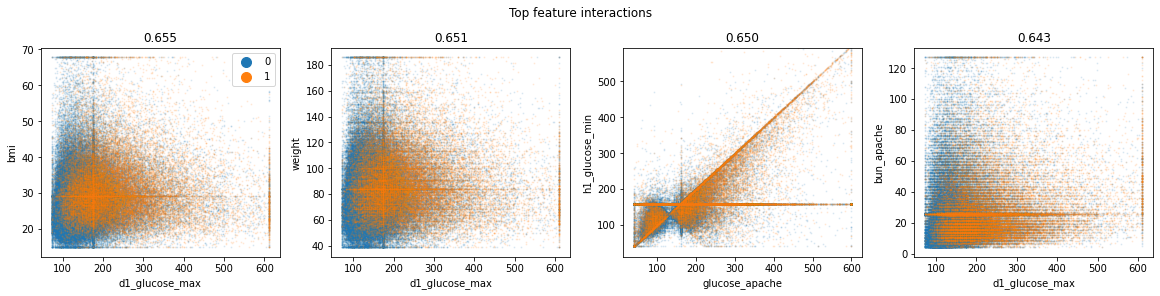

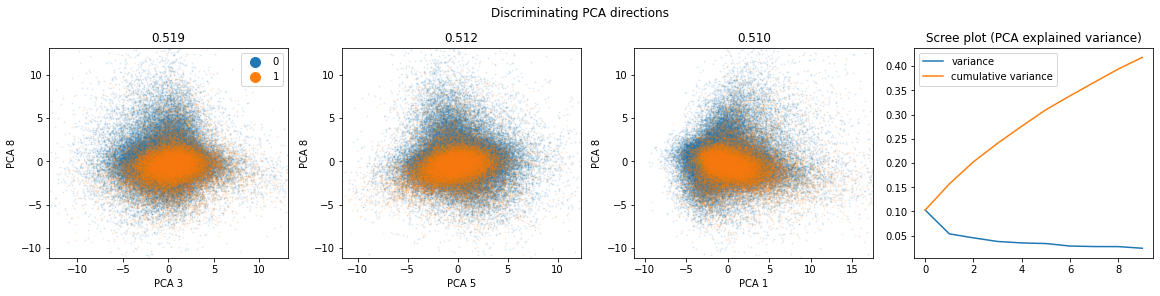

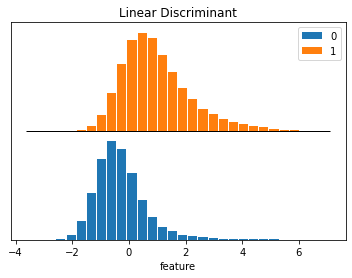

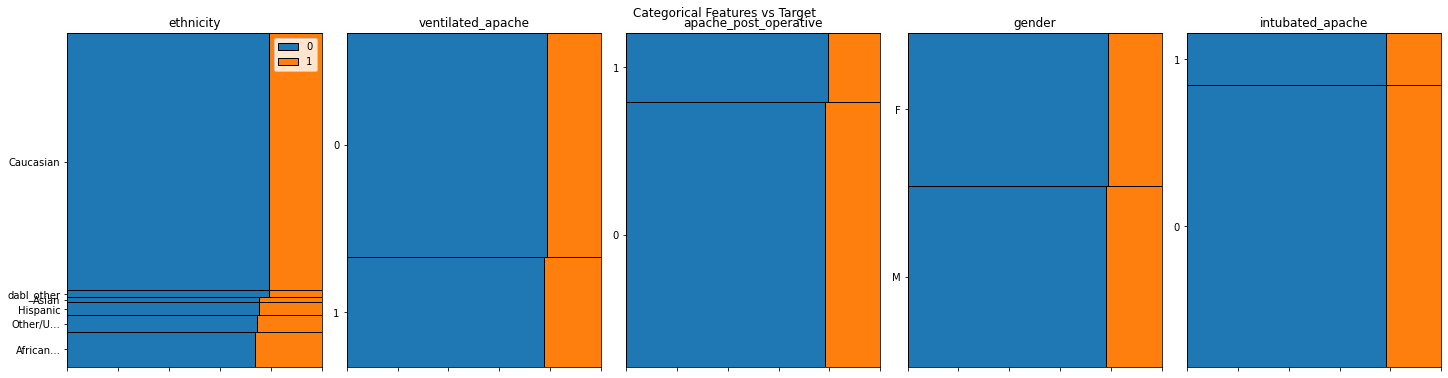

In [ ]:
dabl.plot(df, target_col='diabetes_mellitus')

In [ ]:
df['diabetes_mellitus'].value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [ ]:
sample_1=df.groupby('diabetes_mellitus', group_keys=False).apply(lambda x: x.sample(25000))
sample_1.describe()

age           bmi        height        weight  albumin_apache  \
count  48413.000000  48297.000000  49275.000000  48671.000000    20262.000000   
mean      62.884246     30.095298    169.598347     86.547223        2.871760   
std       16.001297      8.628271     10.832119     25.812156        0.676208   
min        0.000000     14.844926    137.200000     38.600000        1.200000   
25%       54.000000     24.257409    162.500000     68.200000        2.400000   
50%       65.000000     28.537108    170.100000     82.600000        2.900000   
75%       75.000000     34.080658    177.800000    100.000000        3.300000   
max       89.000000     67.814990    195.590000    186.000000        4.600000   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
count        49456.000000         49757.000000           50000.000000   
mean           185.685276           561.914127               0.202460   
std             86.396935           459.512725               0.401837   
min            101.000000             0.010000               0.000000   
25%            113.000000           203.010000               0.000000   
50%            123.000000           410.010000               0.000000   
75%            301.000000           703.030000               0.000000   
max            308.000000          2201.050000               1.000000   

         arf_apache  bilirubin_apache    bun_apache  creatinine_apache  \
count  50000.000000      18447.000000  40759.000000       40961.000000   
mean       0.041300          1.141728     27.739815           1.612804   
std        0.198985          2.233354     21.616052           1.661310   
min        0.000000          0.100000      4.000000           0.300000   
25%        0.000000          0.400000     13.000000           0.740000   
50%        0.000000          0.600000     20.000000           1.050000   
75%        0.000000          1.100000     35.000000           1.700000   
max        1.000000         60.200000    127.000000          11.180000   

        fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count  11798.000000     49253.000000      49253.000000       49788.000000   
mean       0.593577         3.502710          5.505858           0.010746   
std        0.263985         0.926575          1.246872           0.103103   
min        0.210000         1.000000          1.000000           0.000000   
25%        0.400000         3.000000          6.000000           0.000000   
50%        0.500000         4.000000          6.000000           0.000000   
75%        0.800000         4.000000          6.000000           0.000000   
max        1.000000         4.000000          6.000000           1.000000   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  \
count       49253.000000    45802.000000       49897.000000   
mean            4.050007      182.482003          99.658877   
std             1.525068      103.746864          30.345841   
min             1.000000       39.000000          30.000000   
25%             4.000000      101.000000          87.000000   
50%             5.000000      162.000000         104.000000   
75%             5.000000      231.000000         119.000000   
max             5.000000      598.700000         178.000000   

       hematocrit_apache  intubated_apache    map_apache  paco2_apache  \
count       39775.000000      50000.000000  49863.000000  11798.000000   
mean           32.714316          0.156100     87.053192     42.281658   
std             6.734674          0.362954     42.084236     12.370239   
min            16.200000          0.000000     40.000000     18.000000   
25%            27.900000          0.000000     53.000000     34.600000   
50%            32.800000          0.000000     66.000000     40.200000   
75%            37.400000          0.000000    124.000000     47.000000   
max            51.400000          1.000000    200.000000     95.000000   

       paco2_for_ph_apache   pao

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 155 continuous features
Linear Discriminant Analysis training set score: 0.733


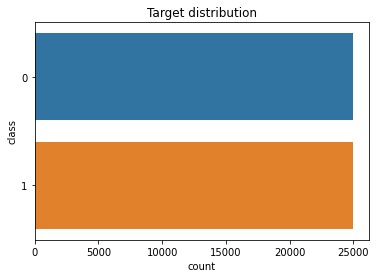

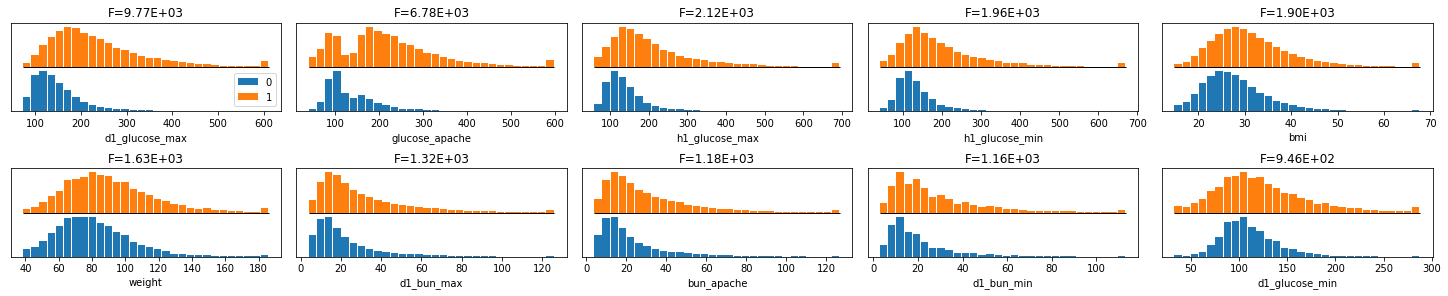

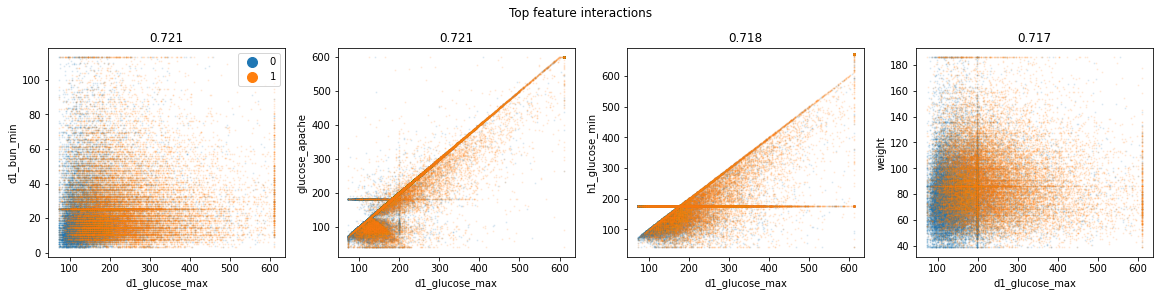

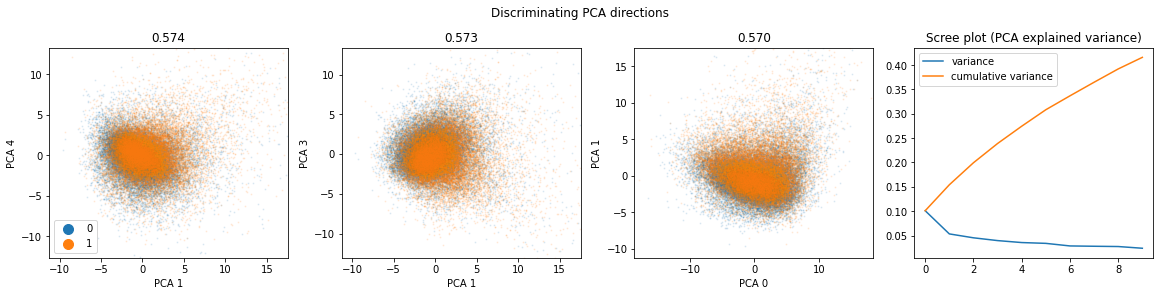

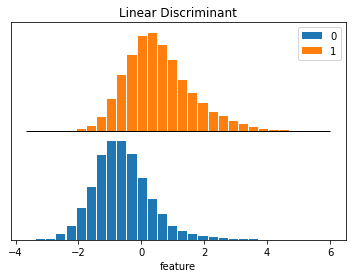

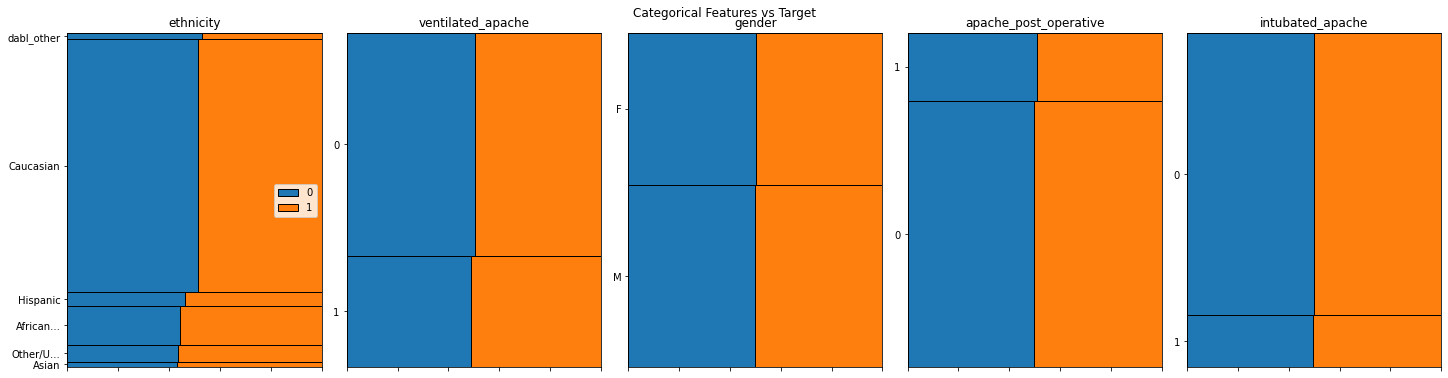

In [ ]:
dabl.plot(sample_1, target_col='diabetes_mellitus')

# Analysis of 'lab', 'vitals', 'lab blood gas' dataset categories for first hour (h1) and first 24_hours (d1) in ICU

##Separate labs between 1_hour (h1) labs and 24_hour (d1) labs


In [ ]:
day_labs=[]
hour_labs=[]
for column in sample_1.columns:
  if column.split('_')[0]=='d1':
    day_labs.append(column)
  elif column.split('_')[0]=='h1':
    hour_labs.append(column)

##Normalize laboratory test data (h1, d1) using a min max scaler

In [ ]:
#Normalize Dataframe based on labs in first 24 hours  in ICU

norm_day_labs = sample_1[day_labs].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

norm_day_labs.describe()

d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
count            13461.000000            13461.000000   49910.000000   
mean                 0.287313                0.491915       0.355531   
std                  0.149597                0.149649       0.171136   
min                  0.000000                0.000000       0.000000   
25%                  0.194444                0.404762       0.235294   
50%                  0.263889                0.488095       0.336134   
75%                  0.354167                0.571429       0.445378   
max                  1.000000                1.000000       1.000000   

       d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
count   49910.000000               49357.000000               49357.000000   
mean        0.473069                   0.356943                   0.473795   
std         0.172532                   0.171062                   0.172939   
min         0.000000                   0.000000                   0.000000   
25%         0.363636                   0.235294                   0.363636   
50%         0.467532                   0.336134                   0.480519   
75%         0.584416                   0.445378                   0.584416   
max         1.000000                   1.000000                   1.000000   

       d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
count      49913.000000      49913.000000         13526.000000   
mean           0.378142          0.442092             0.269114   
std            0.182463          0.106231             0.175201   
min            0.000000          0.000000             0.000000   
25%            0.252101          0.375000             0.176056   
50%            0.361345          0.437500             0.221831   
75%            0.487395          0.506250             0.281690   
max            1.000000          1.000000             1.000000   

       d1_mbp_invasive_min    d1_mbp_max    d1_mbp_min  \
count         13526.000000  49896.000000  49896.000000   
mean              0.510765      0.358260      0.467999   
std               0.150967      0.170397      0.171896   
min               0.000000      0.000000      0.000000   
25%               0.444444      0.241935      0.355556   
50%               0.504274      0.338710      0.455556   
75%               0.589744      0.451613      0.577778   
max               1.000000      1.000000      1.000000   

       d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  \
count            49111.000000            49111.000000     49735.000000   
mean                 0.366815                0.468390         0.188443   
std                  0.173549                0.172195         0.134567   
min                  0.000000                0.000000         0.000000   
25%                  0.247934                0.355556         0.102564   
50%                  0.347107                0.455556         0.153846   
75%                  0.462810                0.577778         0.230769   
max                  1.000000                1.000000         1.000000   

       d1_resprate_min   d1_spo2_max   d1_spo2_min  d1_sysbp_invasive_max  \
count     49735.000000  49816.000000  49816.000000           13473.000000   
mean          0.174958      0.992901      0.903752               0.371714   
std           0.069971      0.017128      0.101460               0.142149   
min           0.000000      0.000000      0.000000               0.000000   
25%           0.138889      0.990000      0.890000               0.281250   
50%           0.180556      1.000000      0.920000               0.357143   
75%           0.222222      1.000000      0.950000               0.441964   
max           1.000000      1.000000      1.000000               1.000000   

       d1_sysbp_invasive_min  d1_sysbp_max  d1_sysbp_min  \
count           13473.000000  49911.000000  49911.000000   
mean                0.517705      0.418440      0.470451

In [ ]:
#Include normalized day_labs data in sample dataset

sample_2a = sample_1
sample_2a[list(norm_day_labs.columns)]=norm_day_labs
sample_2a.describe()

age           bmi        height        weight  albumin_apache  \
count  48413.000000  48297.000000  49275.000000  48671.000000    20262.000000   
mean      62.884246     30.095298    169.598347     86.547223        2.871760   
std       16.001297      8.628271     10.832119     25.812156        0.676208   
min        0.000000     14.844926    137.200000     38.600000        1.200000   
25%       54.000000     24.257409    162.500000     68.200000        2.400000   
50%       65.000000     28.537108    170.100000     82.600000        2.900000   
75%       75.000000     34.080658    177.800000    100.000000        3.300000   
max       89.000000     67.814990    195.590000    186.000000        4.600000   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
count        49456.000000         49757.000000           50000.000000   
mean           185.685276           561.914127               0.202460   
std             86.396935           459.512725               0.401837   
min            101.000000             0.010000               0.000000   
25%            113.000000           203.010000               0.000000   
50%            123.000000           410.010000               0.000000   
75%            301.000000           703.030000               0.000000   
max            308.000000          2201.050000               1.000000   

         arf_apache  bilirubin_apache    bun_apache  creatinine_apache  \
count  50000.000000      18447.000000  40759.000000       40961.000000   
mean       0.041300          1.141728     27.739815           1.612804   
std        0.198985          2.233354     21.616052           1.661310   
min        0.000000          0.100000      4.000000           0.300000   
25%        0.000000          0.400000     13.000000           0.740000   
50%        0.000000          0.600000     20.000000           1.050000   
75%        0.000000          1.100000     35.000000           1.700000   
max        1.000000         60.200000    127.000000          11.180000   

        fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count  11798.000000     49253.000000      49253.000000       49788.000000   
mean       0.593577         3.502710          5.505858           0.010746   
std        0.263985         0.926575          1.246872           0.103103   
min        0.210000         1.000000          1.000000           0.000000   
25%        0.400000         3.000000          6.000000           0.000000   
50%        0.500000         4.000000          6.000000           0.000000   
75%        0.800000         4.000000          6.000000           0.000000   
max        1.000000         4.000000          6.000000           1.000000   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  \
count       49253.000000    45802.000000       49897.000000   
mean            4.050007      182.482003          99.658877   
std             1.525068      103.746864          30.345841   
min             1.000000       39.000000          30.000000   
25%             4.000000      101.000000          87.000000   
50%             5.000000      162.000000         104.000000   
75%             5.000000      231.000000         119.000000   
max             5.000000      598.700000         178.000000   

       hematocrit_apache  intubated_apache    map_apache  paco2_apache  \
count       39775.000000      50000.000000  49863.000000  11798.000000   
mean           32.714316          0.156100     87.053192     42.281658   
std             6.734674          0.362954     42.084236     12.370239   
min            16.200000          0.000000     40.000000     18.000000   
25%            27.900000          0.000000     53.000000     34.600000   
50%            32.800000          0.000000     66.000000     40.200000   
75%            37.400000          0.000000    124.000000     47.000000   
max            51.400000          1.000000    200.000000     95.000000   

       paco2_for_ph_apache   pao

In [ ]:
#Normalize witn MaxMinScaler Dataframe based on labs in first 1 hour in ICU

norm_hour_labs = sample_2a[hour_labs].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

norm_hour_labs.describe()

h1_diasbp_invasive_max  h1_diasbp_invasive_min  h1_diasbp_max  \
count             9731.000000             9731.000000   47881.000000   
mean                 0.339558                0.431069       0.356960   
std                  0.159886                0.165032       0.175297   
min                  0.000000                0.000000       0.000000   
25%                  0.235294                0.317647       0.235849   
50%                  0.323529                0.411765       0.339623   
75%                  0.421569                0.529412       0.462264   
max                  1.000000                1.000000       1.000000   

       h1_diasbp_min  h1_diasbp_noninvasive_max  h1_diasbp_noninvasive_min  \
count   47881.000000               45582.000000               45582.000000   
mean        0.436920                   0.358174                   0.436611   
std         0.177707                   0.174631                   0.176713   
min         0.000000                   0.000000                   0.000000   
25%         0.318681                   0.233645                   0.315217   
50%         0.428571                   0.336449                   0.423913   
75%         0.549451                   0.457944                   0.543478   
max         1.000000                   1.000000                   1.000000   

       h1_heartrate_max  h1_heartrate_min  h1_mbp_invasive_max  \
count      48453.000000      48453.000000          9765.000000   
mean           0.393309          0.443859             0.227426   
std            0.183106          0.186164             0.120223   
min            0.000000          0.000000             0.000000   
25%            0.262712          0.314815             0.164403   
50%            0.372881          0.425926             0.210960   
75%            0.508475          0.564815             0.261397   
max            1.000000          1.000000             1.000000   

       h1_mbp_invasive_min    h1_mbp_max    h1_mbp_min  \
count          9765.000000  47486.000000  47486.000000   
mean              0.507715      0.363545      0.438226   
std               0.144279      0.177634      0.179040   
min               0.000000      0.000000      0.000000   
25%               0.416667      0.241379      0.311321   
50%               0.492424      0.344828      0.424528   
75%               0.598485      0.465517      0.547170   
max               1.000000      1.000000      1.000000   

       h1_mbp_noninvasive_max  h1_mbp_noninvasive_min  h1_resprate_max  \
count            44795.000000            44795.000000     47521.000000   
mean                 0.369341                0.440657         0.256131   
std                  0.180515                0.180226         0.151435   
min                  0.000000                0.000000         0.000000   
25%                  0.245614                0.311321         0.163265   
50%                  0.350877                0.433962         0.224490   
75%                  0.473684                0.556604         0.326531   
max                  1.000000                1.000000         1.000000   

       h1_resprate_min  h1_spo2_max   h1_spo2_min  h1_sysbp_invasive_max  \
count     47521.000000  47619.00000  47619.000000            9742.000000   
mean          0.134381      0.98125      0.952221               0.407434   
std           0.046461      0.03049      0.066559               0.162172   
min           0.000000      0.00000      0.000000               0.000000   
25%           0.102362      0.97000      0.940000               0.298343   
50%           0.125984      0.99000      0.960000               0.392265   
75%           0.157480      1.00000      0.990000               0.502762   
max           1.000000      1.00000      1.000000               1.000000   

       h1_sysbp_invasive_min  h1_sysbp_max  h1_sysbp_min  \
count            9742.000000  47883.000000  47883.000000   
mean                0.498814      0.398658      0.448679   
std  

In [ ]:
#Include normalized hour_labs data in sample dataset

sample_2b = sample_2a
sample_2b[list(norm_hour_labs.columns)]=norm_hour_labs


In [ ]:
sample_2b.describe()

age           bmi        height        weight  albumin_apache  \
count  48413.000000  48297.000000  49275.000000  48671.000000    20262.000000   
mean      62.884246     30.095298    169.598347     86.547223        2.871760   
std       16.001297      8.628271     10.832119     25.812156        0.676208   
min        0.000000     14.844926    137.200000     38.600000        1.200000   
25%       54.000000     24.257409    162.500000     68.200000        2.400000   
50%       65.000000     28.537108    170.100000     82.600000        2.900000   
75%       75.000000     34.080658    177.800000    100.000000        3.300000   
max       89.000000     67.814990    195.590000    186.000000        4.600000   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
count        49456.000000         49757.000000           50000.000000   
mean           185.685276           561.914127               0.202460   
std             86.396935           459.512725               0.401837   
min            101.000000             0.010000               0.000000   
25%            113.000000           203.010000               0.000000   
50%            123.000000           410.010000               0.000000   
75%            301.000000           703.030000               0.000000   
max            308.000000          2201.050000               1.000000   

         arf_apache  bilirubin_apache    bun_apache  creatinine_apache  \
count  50000.000000      18447.000000  40759.000000       40961.000000   
mean       0.041300          1.141728     27.739815           1.612804   
std        0.198985          2.233354     21.616052           1.661310   
min        0.000000          0.100000      4.000000           0.300000   
25%        0.000000          0.400000     13.000000           0.740000   
50%        0.000000          0.600000     20.000000           1.050000   
75%        0.000000          1.100000     35.000000           1.700000   
max        1.000000         60.200000    127.000000          11.180000   

        fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count  11798.000000     49253.000000      49253.000000       49788.000000   
mean       0.593577         3.502710          5.505858           0.010746   
std        0.263985         0.926575          1.246872           0.103103   
min        0.210000         1.000000          1.000000           0.000000   
25%        0.400000         3.000000          6.000000           0.000000   
50%        0.500000         4.000000          6.000000           0.000000   
75%        0.800000         4.000000          6.000000           0.000000   
max        1.000000         4.000000          6.000000           1.000000   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  \
count       49253.000000    45802.000000       49897.000000   
mean            4.050007      182.482003          99.658877   
std             1.525068      103.746864          30.345841   
min             1.000000       39.000000          30.000000   
25%             4.000000      101.000000          87.000000   
50%             5.000000      162.000000         104.000000   
75%             5.000000      231.000000         119.000000   
max             5.000000      598.700000         178.000000   

       hematocrit_apache  intubated_apache    map_apache  paco2_apache  \
count       39775.000000      50000.000000  49863.000000  11798.000000   
mean           32.714316          0.156100     87.053192     42.281658   
std             6.734674          0.362954     42.084236     12.370239   
min            16.200000          0.000000     40.000000     18.000000   
25%            27.900000          0.000000     53.000000     34.600000   
50%            32.800000          0.000000     66.000000     40.200000   
75%            37.400000          0.000000    124.000000     47.000000   
max            51.400000          1.000000    200.000000     95.000000   

       paco2_for_ph_apache   pao

##Drop lab columns where count is < 20% of sample index count (50,000)

In [ ]:
#List of all lab column names - Join norm_hour_labs and norm_day_labs column names into a single list all_lab_columns
all_lab_columns=list(norm_hour_labs.columns.values)
for col in list(norm_day_labs.columns):
  all_lab_columns.append(col)

In [ ]:
labs_under_20per =[]

for col in all_lab_columns:
  if sample_2b[col].count()/sample_2b.count()[-1]< .2:
    labs_under_20per.append(col)

In [ ]:
labs_under_20per

['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

In [ ]:
sample_2b.shape

(50000, 170)

In [ ]:
sample_2c = sample_2b
for col in labs_under_20per:
  sample_2c=sample_2c.drop(col, axis=1)
  norm_hour_labs=norm_hour_labs.drop(col, axis=1)
sample_2c.shape

(50000, 142)

##Correlation Matrix table for Diabetes_Mellitus and 24_hour labs, vitals, labs_blood_ gas (d1)

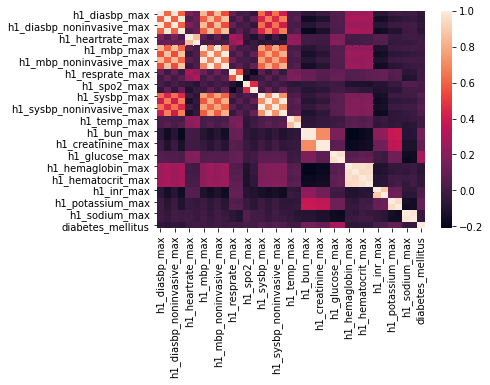

In [ ]:
#Correleation for 1 hour labs
norm_hour_labs['diabetes_mellitus']= sample_2c['diabetes_mellitus']
sns.heatmap(norm_hour_labs.corr());

In [ ]:
matrix_hour_pairs=norm_hour_labs.corr().unstack().sort_values(kind="quicksort")

In [ ]:
diabetes_matrix_hour_pairs= [(pair,matrix_hour_pairs[pair]) for pair in matrix_hour_pairs.index if 'diabetes_mellitus'in list(pair)[0]]

In [ ]:
hour_labs_corr=pd.DataFrame(diabetes_matrix_hour_pairs, columns=['Feature_pair', 'Corr'])
hour_labs_corr

Feature_pair      Corr
0               (diabetes_mellitus, h1_diasbp_min) -0.073025
1   (diabetes_mellitus, h1_diasbp_noninvasive_min) -0.070420
2           (diabetes_mellitus, h1_hemaglobin_min) -0.069862
3           (diabetes_mellitus, h1_hemaglobin_max) -0.067807
4               (diabetes_mellitus, h1_diasbp_max) -0.054223
5           (diabetes_mellitus, h1_hematocrit_max) -0.053766
6           (diabetes_mellitus, h1_hematocrit_min) -0.051557
7   (diabetes_mellitus, h1_diasbp_noninvasive_max) -0.050130
8               (diabetes_mellitus, h1_sodium_min) -0.039297
9               (diabetes_mellitus, h1_sodium_max) -0.038635
10                 (diabetes_mellitus, h1_mbp_min) -0.025119
11     (diabetes_mellitus, h1_mbp_noninvasive_min) -0.019663
12           (diabetes_mellitus, h1_heartrate_max) -0.014187
13                (diabetes_mellitus, h1_temp_min) -0.010506
14                 (diabetes_mellitus, h1_mbp_max) -0.009340
15                (diabetes_mellitus, h1_temp_max) -0.007743
16     (diabetes_mellitus, h1_mbp_noninvasive_max) -0.005437
17            (diabetes_mellitus, h1_resprate_min) -0.004634
18           (diabetes_mellitus, h1_heartrate_min)  0.000594
19            (diabetes_mellitus, h1_resprate_max)  0.002574
20                (diabetes_mellitus, h1_spo2_min)  0.007039
21                (diabetes_mellitus, h1_spo2_max)  0.021245
22                 (diabetes_mellitus, h1_inr_max)  0.032795
23               (diabetes_mellitus, h1_sysbp_min)  0.035431
24                 (diabetes_mellitus, h1_inr_min)  0.036247
25   (diabetes_mellitus, h1_sysbp_noninvasive_min)  0.038573
26               (diabetes_mellitus, h1_sysbp_max)  0.056294
27   (diabetes_mellitus, h1_sysbp_noninvasive_max)  0.056895
28           (diabetes_mellitus, h1_potassium_min)  0.103277
29           (diabetes_mellitus, h1_potassium_max)  0.107803
30          (diabetes_mellitus, h1_creatinine_max)  0.108858
31          (diabetes_mellitus, h1_creatinine_min)  0.109131
32                 (diabetes_mellitus, h1_bun_max)  0.146603
33                 (diabetes_mellitus, h1_bun_min)  0.146706
34             (diabetes_mellitus, h1_glucose_min)  0.287570
35             (diabetes_mellitus, h1_glucose_max)  0.298661
36          (diabetes_mellitus, diabetes_mellitus)  1.000000

##Correlation Matrix table for Diabetes_Mellitus and 24_hour labs, vitals, labs_blood_ gas (d1)

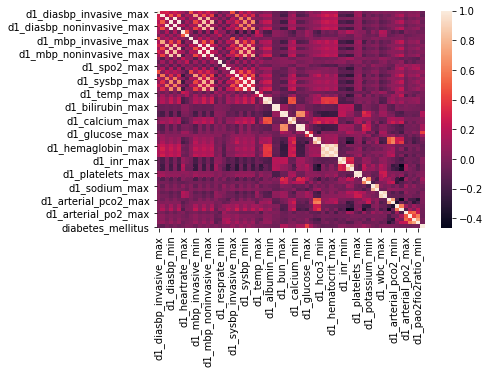

In [ ]:
#Correleation for 24 hour (d1) labs
norm_day_labs['diabetes_mellitus']= sample_2c['diabetes_mellitus']
sns.heatmap(norm_day_labs.corr());

In [ ]:
matrix_day_pairs=norm_day_labs.corr().unstack().sort_values(kind="quicksort")

In [ ]:
diabetes_matrix_day_pairs= [(pair,matrix_day_pairs[pair]) for pair in matrix_day_pairs.index if 'diabetes_mellitus'in list(pair)[0]]

In [ ]:
day_labs_corr=pd.DataFrame(diabetes_matrix_day_pairs, columns=['Feature_pair', 'Corr'])
day_labs_corr

Feature_pair      Corr
0      (diabetes_mellitus, d1_diasbp_invasive_min) -0.109758
1           (diabetes_mellitus, d1_hemaglobin_max) -0.097012
2           (diabetes_mellitus, d1_hematocrit_max) -0.082025
3           (diabetes_mellitus, d1_hemaglobin_min) -0.076421
4      (diabetes_mellitus, d1_diasbp_invasive_max) -0.066039
5           (diabetes_mellitus, d1_hematocrit_min) -0.065136
6               (diabetes_mellitus, d1_diasbp_min) -0.061662
7   (diabetes_mellitus, d1_diasbp_noninvasive_min) -0.060295
8               (diabetes_mellitus, d1_sodium_min) -0.058597
9                 (diabetes_mellitus, d1_hco3_min) -0.055111
10           (diabetes_mellitus, d1_bilirubin_min) -0.054451
11        (diabetes_mellitus, d1_mbp_invasive_min) -0.054106
12           (diabetes_mellitus, d1_bilirubin_max) -0.053975
13        (diabetes_mellitus, d1_arterial_po2_min) -0.048812
14        (diabetes_mellitus, d1_arterial_po2_max) -0.041684
15         (diabetes_mellitus, d1_arterial_ph_min) -0.037080
16           (diabetes_mellitus, d1_heartrate_max) -0.029706
17             (diabetes_mellitus, d1_albumin_min) -0.025587
18            (diabetes_mellitus, d1_resprate_min) -0.025064
19         (diabetes_mellitus, d1_arterial_ph_max) -0.024434
20             (diabetes_mellitus, d1_albumin_max) -0.022148
21       (diabetes_mellitus, d1_pao2fio2ratio_min) -0.021671
22       (diabetes_mellitus, d1_pao2fio2ratio_max) -0.020700
23              (diabetes_mellitus, d1_diasbp_max) -0.020006
24              (diabetes_mellitus, d1_sodium_max) -0.019643
25  (diabetes_mellitus, d1_diasbp_noninvasive_max) -0.018662
26                 (diabetes_mellitus, d1_mbp_min) -0.017734
27     (diabetes_mellitus, d1_mbp_noninvasive_min) -0.016244
28                (diabetes_mellitus, d1_temp_max) -0.012248
29                (diabetes_mellitus, d1_hco3_max) -0.008391
30             (diabetes_mellitus, d1_lactate_min) -0.006691
31                (diabetes_mellitus, d1_temp_min) -0.006354
32             (diabetes_mellitus, d1_lactate_max) -0.003432
33       (diabetes_mellitus, d1_arterial_pco2_min)  0.000027
34       (diabetes_mellitus, d1_arterial_pco2_max)  0.001131
35        (diabetes_mellitus, d1_mbp_invasive_max)  0.004678
36                 (diabetes_mellitus, d1_wbc_max)  0.005974
37                (diabetes_mellitus, d1_spo2_min)  0.006684
38            (diabetes_mellitus, d1_resprate_max)  0.010620
39                 (diabetes_mellitus, d1_wbc_min)  0.011885
40      (diabetes_mellitus, d1_sysbp_invasive_min)  0.012923
41                (diabetes_mellitus, d1_spo2_max)  0.019044
42           (diabetes_mellitus, d1_heartrate_min)  0.019953
43                 (diabetes_mellitus, d1_mbp_max)  0.022330
44     (diabetes_mellitus, d1_mbp_noninvasive_max)  0.023694
45             (diabetes_mellitus, d1_calcium_min)  0.027454
46           (diabetes_mellitus, d1_platelets_max)  0.027653
47           (diabetes_mellitus, d1_platelets_min)  0.030469
48                 (diabetes_mellitus, d1_inr_max)  0.032795
49               (diabetes_mellitus, d1_sysbp_min)  0.033989
50   (diabetes_mellitus, d1_sysbp_noninvasive_min)  0.034035
51                 (diabetes_mellitus, d1_inr_min)  0.036247
52           (diabetes_mellitus, d1_potassium_min)  0.042032
53             (diabetes_mellitus, d1_calcium_max)  0.052857
54      (diabetes_mellitus, d1_sysbp_invasive_max)  0.078944
55   (diabetes_mellitus, d1_sysbp_noninvasive_max)  0.087177
56               (diabetes_mellitus, d1_sysbp_max)  0.087177
57           (diabetes_mellitus, d1_potassium_max)  0.108487
58          (diabetes_mellitus, d1_creatinine_min)  0.138690
59             (diabetes_mellitus, d1_glucose_min)  0.139627
60          (diabetes_mellitus, d1_creatinine_max)  0.140466
61                 (diabetes_mellitus, d1_bun_min)  0.158644
62                 (diabetes_mellitus, d1_bun_max)  0.169116
63             (diabetes_mellitus, d1_glucose_max)  0.414266
64          (diabetes_mellitus, diabetes_mellitus)  1.000000

##Drop columns with near zero correlation (abs < .09)

In [ ]:
zero_day_corr=list(day_labs_corr[abs(day_labs_corr['Corr'])<0.09]['Feature_pair'])

In [ ]:
zero_hour_corr=list(hour_labs_corr[abs(hour_labs_corr['Corr'])<0.09]['Feature_pair'])

In [ ]:
zero_corr_columns=[]
for i in range(len(zero_day_corr)):
  zero_corr_columns.append(zero_day_corr[i][1])

for i in range(len(zero_hour_corr)):
  zero_corr_columns.append(zero_hour_corr[i][1])

len(zero_corr_columns)

83

In [ ]:
len(norm_day_labs.columns)+len(norm_hour_labs.columns)

102

##Drop from Sample data labels that show little to no correlation to target variable

In [ ]:
sample_2d=sample_2c.drop(zero_corr_columns, axis=1)

In [ ]:
sample_2d.shape

(50000, 59)

##EDA of Sample based on revised Lab features within the first hour (h1) and 24 hours (d1)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 44 continuous features
Linear Discriminant Analysis training set score: 0.725


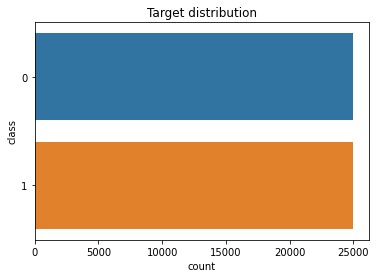

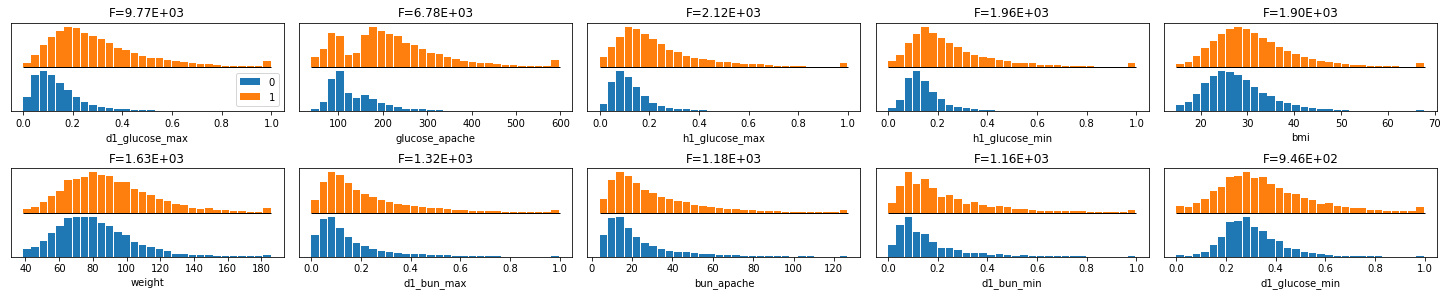

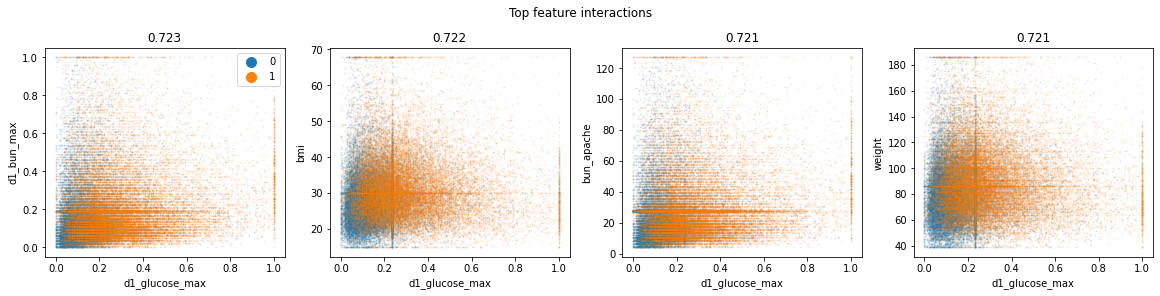

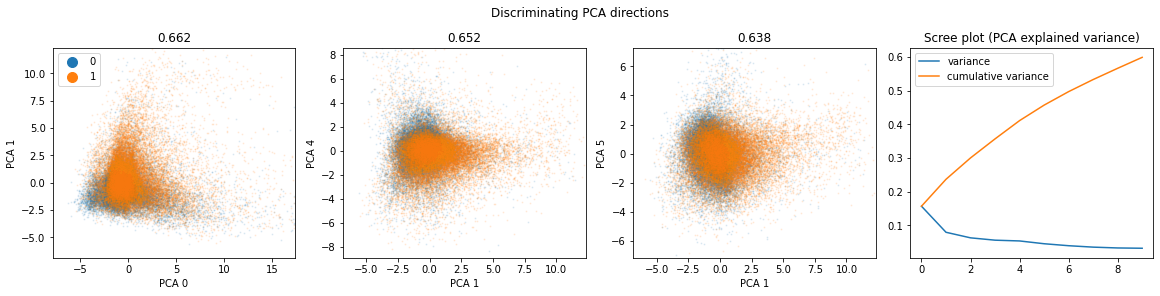

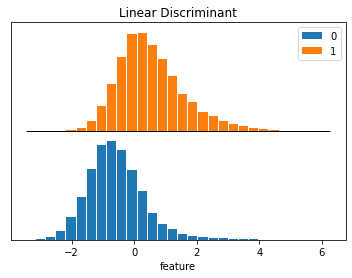

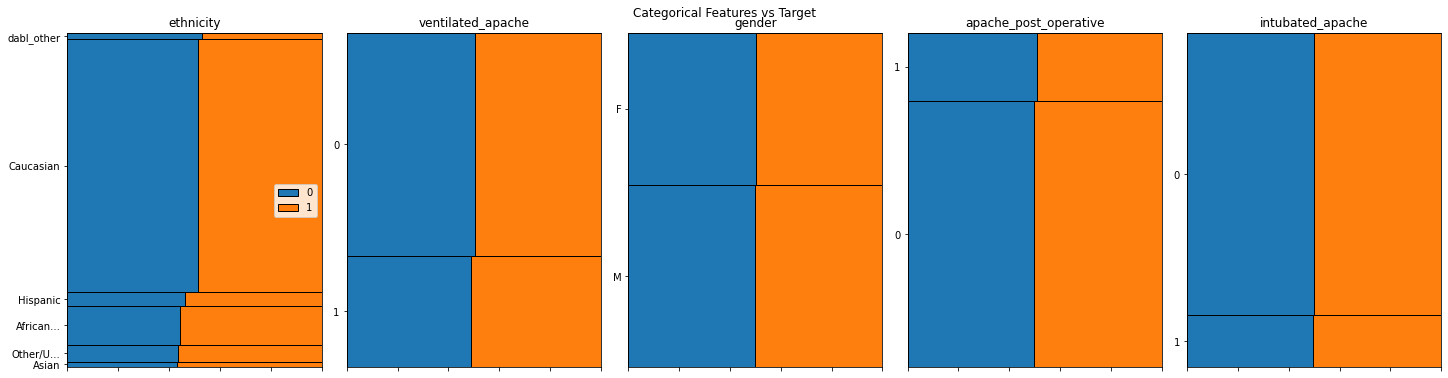

In [ ]:
dabl.plot(sample_2d, target_col='diabetes_mellitus')

# Analysis of Demographic Data

In [ ]:
sample_3a=sample_2d

In [ ]:
demo1 = sample_3a[demographic]

In [ ]:
demo1.ethnicity.value_counts()/demo1.ethnicity.count(),demo1.ethnicity.value_counts()


(Caucasian           0.764565
 African American    0.117373
 Other/Unknown       0.051181
 Hispanic            0.041491
 Asian               0.016973
 Native American     0.008416
 Name: ethnicity, dtype: float64, Caucasian           37794
 African American     5802
 Other/Unknown        2530
 Hispanic             2051
 Asian                 839
 Native American       416
 Name: ethnicity, dtype: int64)

In [ ]:
demo1.gender.value_counts()/demo1.gender.count(), demo1.gender.value_counts()

(M    0.545889
 F    0.454111
 Name: gender, dtype: float64, M    27283
 F    22696
 Name: gender, dtype: int64)

##Demographic Heatmap

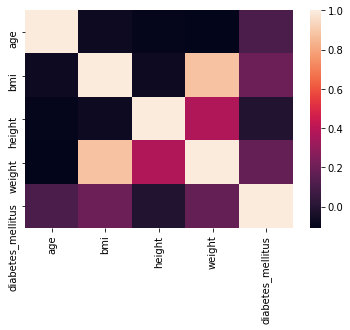

In [ ]:
#Correleation for demographic data
sns.heatmap(demo1.corr());

##Drop height from the dataset as there is no corrolation

In [ ]:
demographic.remove('height')

In [ ]:

sample_3b =sample_3a.drop('height', axis=1)

##Encode categorical demographic data (ethincity, gender)

In [ ]:
demo_cat=pd.get_dummies(sample_3b[['gender','ethnicity']])


In [ ]:
demographic2=demographic+list(demo_cat.columns)
demographic2.remove('gender')
demographic2.remove('ethnicity')

##Join encoded demographic data for ethnicity and gender to sample dataset (sample_3c) and drop 'ethnicity' and 'gender' columns

In [ ]:
sample_3c = sample_3b.join(demo_cat)
sample_3c=sample_3c.drop(['gender','ethnicity'], axis=1)
sample_3c.head()

age        bmi  weight  albumin_apache  apache_2_diagnosis  \
115391  48.0  28.571416    64.2             3.4               122.0   
69518   51.0  42.328042   105.0             4.2               301.0   
44079   77.0  19.676255    48.5             NaN               307.0   
2516    74.0        NaN     NaN             NaN               202.0   
112777  46.0  26.889931    80.2             2.9               124.0   

        apache_3j_diagnosis  apache_post_operative  arf_apache  \
115391               703.03                      0           0   
69518                403.01                      0           0   
44079                704.10                      0           0   
2516                1203.02                      1           0   
112777               305.02                      0           0   

        bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
115391               0.3         8.0               0.66          NaN   
69518                NaN        19.0               0.87          NaN   
44079                NaN         5.0               0.40          NaN   
2516                 NaN        17.0               0.90          NaN   
112777               1.7        23.0               0.56          NaN   

        gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
115391              4.0               6.0                0.0   
69518               3.0               4.0                0.0   
44079               4.0               6.0                0.0   
2516                4.0               6.0                0.0   
112777              3.0               6.0                0.0   

        gcs_verbal_apache  glucose_apache  heart_rate_apache  \
115391                5.0            59.0               35.0   
69518                 1.0           152.0              101.0   
44079                 4.0           106.0               99.0   
2516                  5.0           137.0              100.0   
112777                5.0            93.0              103.0   

        hematocrit_apache  intubated_apache  map_apache  paco2_apache  \
115391               41.9                 0        62.0           NaN   
69518                48.0                 0       143.0           NaN   
44079                 NaN                 0        65.0           NaN   
2516                 34.5                 0        49.0           NaN   
112777               24.4                 0       126.0           NaN   

        paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
115391                  NaN          NaN        NaN             29.0   
69518                   NaN          NaN        NaN             34.0   
44079                   NaN          NaN        NaN             28.0   
2516                    NaN          NaN        NaN             13.0   
112777                  NaN          NaN        NaN              5.0   

        sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  \
115391          137.0         36.4           1994.1984                  0   
69518           139.0         37.1            870.9984                  0   
44079           119.0         37.2           1670.2848                  0   
2516            134.0         36.4                 NaN                  0   
112777          136.0         36.8           3738.1824                  0   

        wbc_apache  d1_diasbp_invasive_min  d1_bun_max  d1_bun_min  \
115391         4.2                     NaN    0.008197    0.018167   
69518         16.1                     NaN    0.122951    0.118085   
44079          NaN                     NaN    0.016393    0.009083   
2516           8.1                0.369048    0.106557    0.127169   
112777         3.5                     NaN    0.155738    0.154419   

        d1_creatinine_max  d1_creatinine_min  d1_glucose_max  d1_glucose_min  \
115391           0.029712           0.037353        0.092937        0.101961   
69518            0.056639           0.059142        0.146840      

In [ ]:
sample_3c.shape

(50000, 64)

##Normalize demographic - age, weight, bmi using a max min scaler

In [ ]:
sample_3d =sample_3c

sample_3d[['age','bmi','weight']] = sample_3d[['age','bmi','weight']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
sample_3d.describe()


age           bmi        weight  albumin_apache  \
count  48413.000000  48297.000000  48671.000000    20262.000000   
mean       0.706565      0.287905      0.325286        2.871760   
std        0.179790      0.162890      0.175116        0.676208   
min        0.000000      0.000000      0.000000        1.200000   
25%        0.606742      0.177694      0.200814        2.400000   
50%        0.730337      0.258489      0.298507        2.900000   
75%        0.842697      0.363143      0.416554        3.300000   
max        1.000000      1.000000      1.000000        4.600000   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
count        49456.000000         49757.000000           50000.000000   
mean           185.685276           561.914127               0.202460   
std             86.396935           459.512725               0.401837   
min            101.000000             0.010000               0.000000   
25%            113.000000           203.010000               0.000000   
50%            123.000000           410.010000               0.000000   
75%            301.000000           703.030000               0.000000   
max            308.000000          2201.050000               1.000000   

         arf_apache  bilirubin_apache    bun_apache  creatinine_apache  \
count  50000.000000      18447.000000  40759.000000       40961.000000   
mean       0.041300          1.141728     27.739815           1.612804   
std        0.198985          2.233354     21.616052           1.661310   
min        0.000000          0.100000      4.000000           0.300000   
25%        0.000000          0.400000     13.000000           0.740000   
50%        0.000000          0.600000     20.000000           1.050000   
75%        0.000000          1.100000     35.000000           1.700000   
max        1.000000         60.200000    127.000000          11.180000   

        fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count  11798.000000     49253.000000      49253.000000       49788.000000   
mean       0.593577         3.502710          5.505858           0.010746   
std        0.263985         0.926575          1.246872           0.103103   
min        0.210000         1.000000          1.000000           0.000000   
25%        0.400000         3.000000          6.000000           0.000000   
50%        0.500000         4.000000          6.000000           0.000000   
75%        0.800000         4.000000          6.000000           0.000000   
max        1.000000         4.000000          6.000000           1.000000   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  \
count       49253.000000    45802.000000       49897.000000   
mean            4.050007      182.482003          99.658877   
std             1.525068      103.746864          30.345841   
min             1.000000       39.000000          30.000000   
25%             4.000000      101.000000          87.000000   
50%             5.000000      162.000000         104.000000   
75%             5.000000      231.000000         119.000000   
max             5.000000      598.700000         178.000000   

       hematocrit_apache  intubated_apache    map_apache  paco2_apache  \
count       39775.000000      50000.000000  49863.000000  11798.000000   
mean           32.714316          0.156100     87.053192     42.281658   
std             6.734674          0.362954     42.084236     12.370239   
min            16.200000          0.000000     40.000000     18.000000   
25%            27.900000          0.000000     53.000000     34.600000   
50%            32.800000          0.000000     66.000000     40.200000   
75%            37.400000          0.000000    124.000000     47.000000   
max            51.400000          1.000000    200.000000     95.000000   

       paco2_for_ph_apache   pao2_apache     ph_apache  resprate_apache  \
count         11798.000000  11798.000000  11798.000000     49686.000000   
mean    

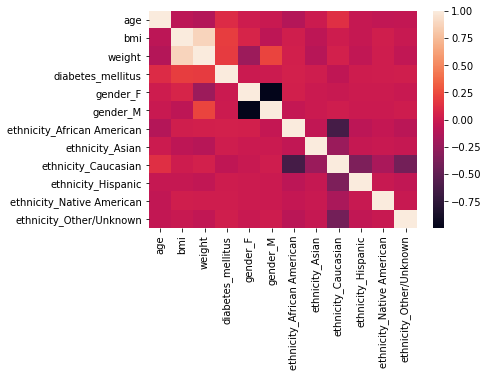

In [ ]:
demo2= sample_3d[demographic2]

#Correleation for demographic data
adj_heatmap=sns.heatmap(demo2.corr())
adj_heatmap;

##Demographic Matrix Corr Pairs

In [ ]:
matrix_demo_pairs=demo2.corr().unstack().sort_values(kind="quicksort")
diabetes_matrix_demo_pairs= [(pair,matrix_demo_pairs[pair]) for pair in matrix_demo_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
demo_corr=pd.DataFrame(diabetes_matrix_demo_pairs, columns=['Feature_pair', 'Corr'])
demo_corr

Feature_pair      Corr
0          (diabetes_mellitus, ethnicity_Caucasian) -0.054474
1                     (diabetes_mellitus, gender_F) -0.006267
2                     (diabetes_mellitus, gender_M)  0.006708
3           (diabetes_mellitus, ethnicity_Hispanic)  0.015025
4              (diabetes_mellitus, ethnicity_Asian)  0.017906
5    (diabetes_mellitus, ethnicity_Native American)  0.020697
6      (diabetes_mellitus, ethnicity_Other/Unknown)  0.029565
7   (diabetes_mellitus, ethnicity_African American)  0.039841
8                          (diabetes_mellitus, age)  0.107812
9                       (diabetes_mellitus, weight)  0.180211
10                         (diabetes_mellitus, bmi)  0.194611
11           (diabetes_mellitus, diabetes_mellitus)  1.000000

##Based on the lack of even moderate correlation between ethnicity, gender and diabetes - we will drop these columns from the sample dataset

In [ ]:
drop_demo=list(demo_cat.columns)

In [ ]:
sample_3e=sample_3d

sample_3e=sample_3e.drop(drop_demo, axis=1)

In [ ]:
sample_3e.diabetes_mellitus.count()

50000

##EDA of Sample_3e based on revised Demographic features 

/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 43 continuous features
Linear Discriminant Analysis training set score: 0.725


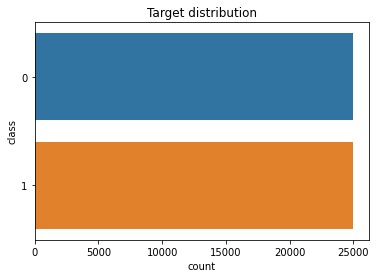

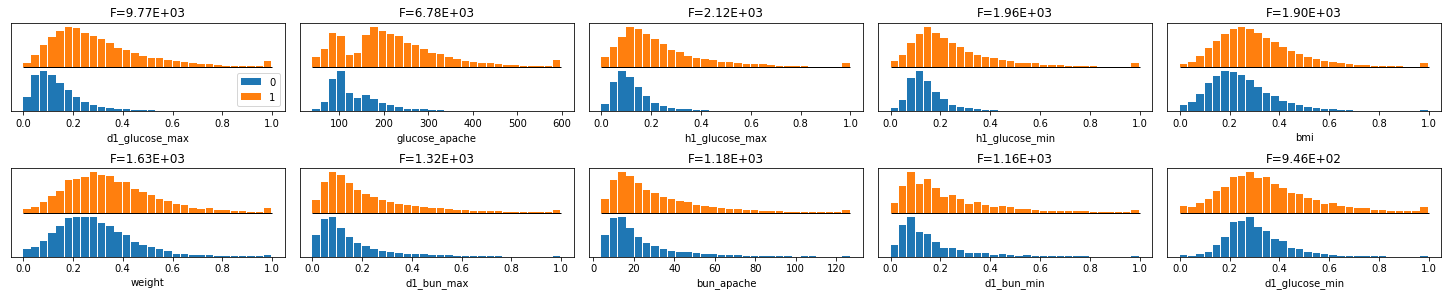

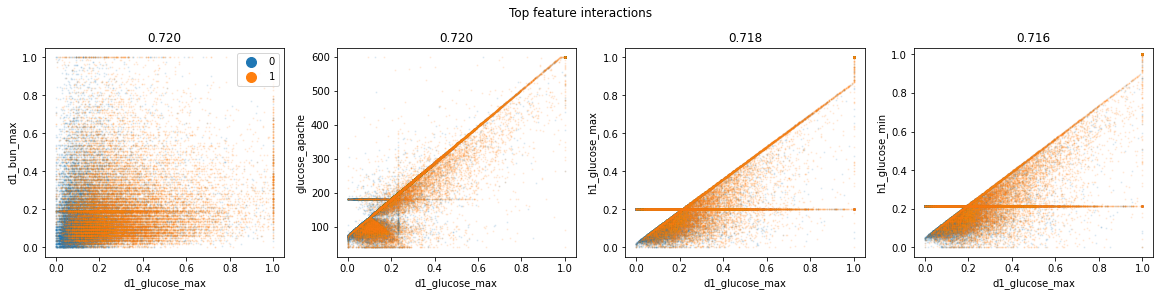

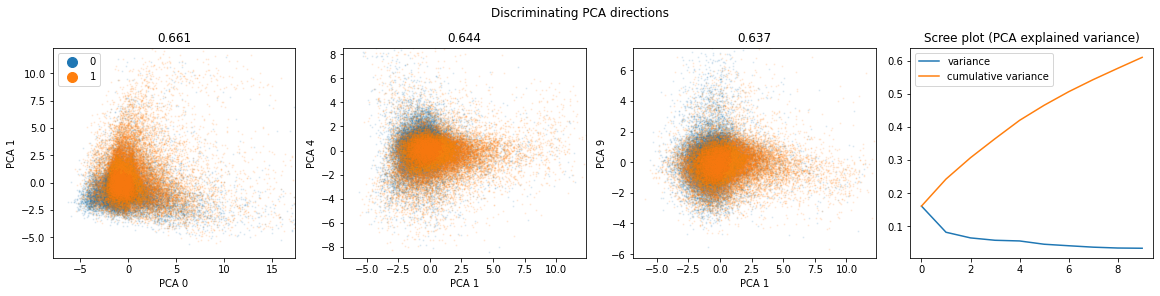

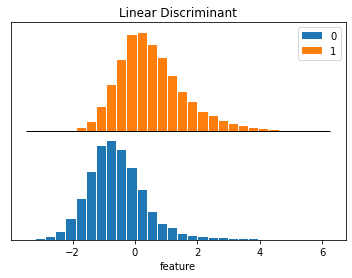

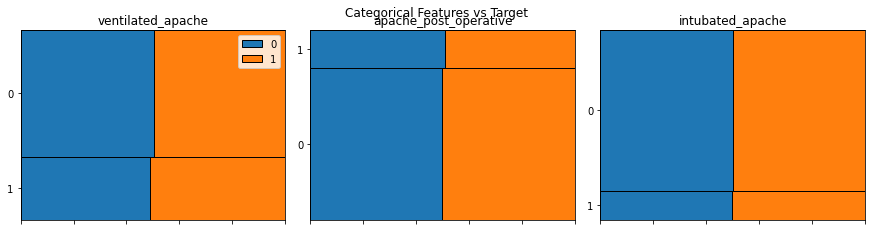

In [ ]:
dabl.plot(sample_3e, 'diabetes_mellitus')


#Analysis of APACHE_covariate Data

##APACHE_covariate Heatmaps and description

In [ ]:
sample_4=sample_3e

sample_4[APACHE_covariate ].describe()

albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    20262.000000        49456.000000         49757.000000   
mean         2.871760          185.685276           561.914127   
std          0.676208           86.396935           459.512725   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           203.010000   
50%          2.900000          123.000000           410.010000   
75%          3.300000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative    arf_apache  bilirubin_apache    bun_apache  \
count           50000.000000  50000.000000      18447.000000  40759.000000   
mean                0.202460      0.041300          1.141728     27.739815   
std                 0.401837      0.198985          2.233354     21.616052   
min                 0.000000      0.000000          0.100000      4.000000   
25%                 0.000000      0.000000          0.400000     13.000000   
50%                 0.000000      0.000000          0.600000     20.000000   
75%                 0.000000      0.000000          1.100000     35.000000   
max                 1.000000      1.000000         60.200000    127.000000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count       40961.000000  11798.000000     49253.000000      49253.000000   
mean            1.612804      0.593577         3.502710          5.505858   
std             1.661310      0.263985         0.926575          1.246872   
min             0.300000      0.210000         1.000000          1.000000   
25%             0.740000      0.400000         3.000000          6.000000   
50%             1.050000      0.500000         4.000000          6.000000   
75%             1.700000      0.800000         4.000000          6.000000   
max            11.180000      1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count       49788.000000       49253.000000    45802.000000   
mean            0.010746           4.050007      182.482003   
std             0.103103           1.525068      103.746864   
min             0.000000           1.000000       39.000000   
25%             0.000000           4.000000      101.000000   
50%             0.000000           5.000000      162.000000   
75%             0.000000           5.000000      231.000000   
max             1.000000           5.000000      598.700000   

       heart_rate_apache  hematocrit_apache  intubated_apache    map_apache  \
count       49897.000000       39775.000000      50000.000000  49863.000000   
mean           99.658877          32.714316          0.156100     87.053192   
std            30.345841           6.734674          0.362954     42.084236   
min            30.000000          16.200000          0.000000     40.000000   
25%            87.000000          27.900000          0.000000     53.000000   
50%           104.000000          32.800000          0.000000     66.000000   
75%           119.000000          37.400000          0.000000    124.000000   
max           178.000000          51.400000          1.000000    200.000000   

       paco2_apache  paco2_for_ph_apache   pao2_apache     ph_apache  \
count  11798.000000         11798.000000  11798.000000  11798.000000   
mean      42.281658            42.281658    129.725394      7.351012   
std       12.370239            12.370239     83.221701      0.098281   
min       18.000000            18.000000     31.000000      6.960540   
25%       34.600000            34.600000     76.000000      7.300000   
50%       40.200000            40.200000    102.000000      7.360000   
75%       47.000000            47.000000    152.000000      7.410000   
max       95.000000            95.000000    498.000000      7.590000   

       resprate_apache  sodium_apache   temp_apache  urineoutput_apache  \
count     4

##Normalize APACHE_covariate data

In [ ]:
sample_4[APACHE_covariate] = sample_4[APACHE_covariate].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
norm_covariate= sample_4[APACHE_covariate]
norm_covariate.describe()

albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    20262.000000        49456.000000         49757.000000   
mean         0.491694            0.409108             0.255290   
std          0.198885            0.417376             0.208771   
min          0.000000            0.000000             0.000000   
25%          0.352941            0.057971             0.092229   
50%          0.500000            0.106280             0.186276   
75%          0.617647            0.966184             0.319404   
max          1.000000            1.000000             1.000000   

       apache_post_operative    arf_apache  bilirubin_apache    bun_apache  \
count           50000.000000  50000.000000      18447.000000  40759.000000   
mean                0.202460      0.041300          0.017333      0.193007   
std                 0.401837      0.198985          0.037161      0.175740   
min                 0.000000      0.000000          0.000000      0.000000   
25%                 0.000000      0.000000          0.004992      0.073171   
50%                 0.000000      0.000000          0.008319      0.130081   
75%                 0.000000      0.000000          0.016639      0.252033   
max                 1.000000      1.000000          1.000000      1.000000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count       40961.000000  11798.000000     49253.000000      49253.000000   
mean            0.120662      0.485540         0.834237          0.901172   
std             0.152694      0.334158         0.308858          0.249374   
min             0.000000      0.000000         0.000000          0.000000   
25%             0.040441      0.240506         0.666667          1.000000   
50%             0.068934      0.367089         1.000000          1.000000   
75%             0.128676      0.746835         1.000000          1.000000   
max             1.000000      1.000000         1.000000          1.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count       49788.000000       49253.000000    45802.000000   
mean            0.010746           0.762502        0.256355   
std             0.103103           0.381267        0.185362   
min             0.000000           0.000000        0.000000   
25%             0.000000           0.750000        0.110774   
50%             0.000000           1.000000        0.219761   
75%             0.000000           1.000000        0.343041   
max             1.000000           1.000000        1.000000   

       heart_rate_apache  hematocrit_apache  intubated_apache    map_apache  \
count       49897.000000       39775.000000      50000.000000  49863.000000   
mean            0.470668           0.469157          0.156100      0.294082   
std             0.205039           0.191326          0.362954      0.263026   
min             0.000000           0.000000          0.000000      0.000000   
25%             0.385135           0.332386          0.000000      0.081250   
50%             0.500000           0.471591          0.000000      0.162500   
75%             0.601351           0.602273          0.000000      0.525000   
max             1.000000           1.000000          1.000000      1.000000   

       paco2_apache  paco2_for_ph_apache   pao2_apache     ph_apache  \
count  11798.000000         11798.000000  11798.000000  11798.000000   
mean       0.315346             0.315346      0.211403      0.620328   
std        0.160652             0.160652      0.178205      0.156135   
min        0.000000             0.000000      0.000000      0.000000   
25%        0.215584             0.215584      0.096360      0.539288   
50%        0.288312             0.288312      0.152034      0.634607   
75%        0.376623             0.376623      0.259101      0.714041   
max        1.000000             1.000000      1.000000      1.000000   

       resprate_apache  sodium_apache   temp_apache  urineoutput_apache  \
count     4

##Replace APACHE_covariate original data with normalized data

In [ ]:
sample_4[APACHE_covariate]=norm_covariate
sample_4b =sample_4

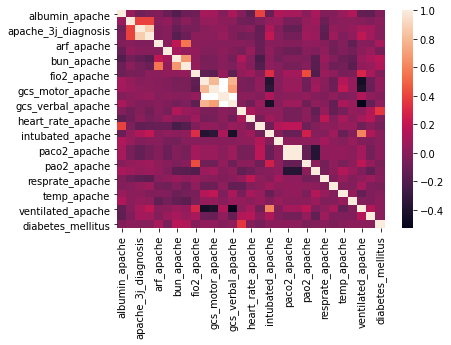

In [ ]:
sns.heatmap(norm_covariate.corr())

In [ ]:
matrix_covariate_pairs=norm_covariate .corr().unstack().sort_values(kind="quicksort")
diabetes_matrix_covariate_pairs= [(pair,matrix_covariate_pairs[pair]) for pair in matrix_covariate_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
covariate_corr=pd.DataFrame(diabetes_matrix_covariate_pairs, columns=['Feature_pair', 'Corr'])
covariate_corr

Feature_pair      Corr
0       (diabetes_mellitus, hematocrit_apache) -0.065842
1        (diabetes_mellitus, bilirubin_apache) -0.055476
2           (diabetes_mellitus, sodium_apache) -0.047933
3             (diabetes_mellitus, pao2_apache) -0.047755
4          (diabetes_mellitus, albumin_apache) -0.025210
5       (diabetes_mellitus, heart_rate_apache) -0.021910
6               (diabetes_mellitus, ph_apache) -0.020862
7             (diabetes_mellitus, fio2_apache) -0.018572
8       (diabetes_mellitus, gcs_unable_apache) -0.013651
9             (diabetes_mellitus, temp_apache) -0.009641
10  (diabetes_mellitus, apache_post_operative) -0.008710
11    (diabetes_mellitus, apache_3j_diagnosis) -0.006779
12        (diabetes_mellitus, resprate_apache) -0.004098
13             (diabetes_mellitus, map_apache)  0.002134
14       (diabetes_mellitus, intubated_apache)  0.002149
15             (diabetes_mellitus, wbc_apache)  0.004248
16     (diabetes_mellitus, apache_2_diagnosis)  0.004685
17    (diabetes_mellitus, paco2_for_ph_apache)  0.006882
18           (diabetes_mellitus, paco2_apache)  0.006882
19      (diabetes_mellitus, ventilated_apache)  0.016072
20     (diabetes_mellitus, urineoutput_apache)  0.016838
21      (diabetes_mellitus, gcs_verbal_apache)  0.022214
22       (diabetes_mellitus, gcs_motor_apache)  0.026925
23        (diabetes_mellitus, gcs_eyes_apache)  0.029692
24             (diabetes_mellitus, arf_apache)  0.105637
25      (diabetes_mellitus, creatinine_apache)  0.138924
26             (diabetes_mellitus, bun_apache)  0.167951
27         (diabetes_mellitus, glucose_apache)  0.361461
28      (diabetes_mellitus, diabetes_mellitus)  1.000000

##Drop APACHE_covariate columns that have near 0 corrolation to 'diabetes_mellitus' from sample dataset (sample_4b)

In [ ]:
zero_covariate_corr=list(covariate_corr[abs(covariate_corr['Corr'])<0.09]['Feature_pair'])
zero_covariate_corr

[('diabetes_mellitus', 'hematocrit_apache'),
 ('diabetes_mellitus', 'bilirubin_apache'),
 ('diabetes_mellitus', 'sodium_apache'),
 ('diabetes_mellitus', 'pao2_apache'),
 ('diabetes_mellitus', 'albumin_apache'),
 ('diabetes_mellitus', 'heart_rate_apache'),
 ('diabetes_mellitus', 'ph_apache'),
 ('diabetes_mellitus', 'fio2_apache'),
 ('diabetes_mellitus', 'gcs_unable_apache'),
 ('diabetes_mellitus', 'temp_apache'),
 ('diabetes_mellitus', 'apache_post_operative'),
 ('diabetes_mellitus', 'apache_3j_diagnosis'),
 ('diabetes_mellitus', 'resprate_apache'),
 ('diabetes_mellitus', 'map_apache'),
 ('diabetes_mellitus', 'intubated_apache'),
 ('diabetes_mellitus', 'wbc_apache'),
 ('diabetes_mellitus', 'apache_2_diagnosis'),
 ('diabetes_mellitus', 'paco2_for_ph_apache'),
 ('diabetes_mellitus', 'paco2_apache'),
 ('diabetes_mellitus', 'ventilated_apache'),
 ('diabetes_mellitus', 'urineoutput_apache'),
 ('diabetes_mellitus', 'gcs_verbal_apache'),
 ('diabetes_mellitus', 'gcs_motor_apache'),
 ('diabetes_

In [ ]:
zero_corr_covariate_cols=[]
for i in range(len(zero_covariate_corr)):
  zero_corr_covariate_cols.append(zero_covariate_corr[i][1])

In [ ]:
sample_4c=sample_4b.drop(zero_corr_covariate_cols, axis=1)
sample_4c.shape

(50000, 32)

#Analysis of APACHE_comorbidity Data

In [ ]:
sample_5=sample_4c

aids     cirrhosis  hepatic_failure  immunosuppression  \
count  50000.000000  50000.000000      50000.00000       50000.000000   
mean       0.000780      0.017040          0.01368           0.025360   
std        0.027918      0.129422          0.11616           0.157218   
min        0.000000      0.000000          0.00000           0.000000   
25%        0.000000      0.000000          0.00000           0.000000   
50%        0.000000      0.000000          0.00000           0.000000   
75%        0.000000      0.000000          0.00000           0.000000   
max        1.000000      1.000000          1.00000           1.000000   

           leukemia      lymphoma  solid_tumor_with_metastasis  \
count  50000.000000  50000.000000                  50000.00000   
mean       0.007780      0.004480                      0.01968   
std        0.087861      0.066783                      0.13890   
min        0.000000      0.000000                      0.00000   
25%        0.000000      0.000000                      0.00000   
50%        0.000000      0.000000                      0.00000   
75%        0.000000      0.000000                      0.00000   
max        1.000000      1.000000                      1.00000   

       diabetes_mellitus  
count       50000.000000  
mean            0.500000  
std             0.500005  
min             0.000000  
25%             0.000000  
50%             0.500000  
75%             1.000000  
max             1.000000

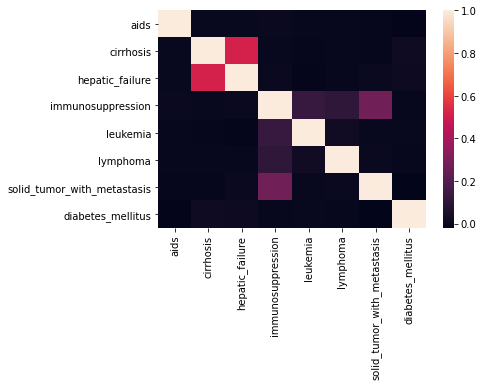

In [ ]:
#Correleation for APACHE_comorbidity category    
sns.heatmap(sample_5[APACHE_comorbidity ].corr());
sample_5[APACHE_comorbidity ].describe()

In [ ]:
matrix_comorbid_pairs=sample_5[APACHE_comorbidity ].corr().unstack().sort_values(kind="quicksort")
diabetes_matrix_comorbid_pairs= [(pair,matrix_comorbid_pairs[pair]) for pair in matrix_comorbid_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
comorbid_corr=pd.DataFrame(diabetes_matrix_comorbid_pairs, columns=['Feature_pair', 'Corr'])
comorbid_corr

Feature_pair      Corr
0  (diabetes_mellitus, solid_tumor_with_metastasis) -0.019583
1                         (diabetes_mellitus, aids) -0.012179
2                     (diabetes_mellitus, lymphoma) -0.002396
3            (diabetes_mellitus, immunosuppression) -0.000763
4                     (diabetes_mellitus, leukemia)  0.001138
5              (diabetes_mellitus, hepatic_failure)  0.013086
6                    (diabetes_mellitus, cirrhosis)  0.018853
7            (diabetes_mellitus, diabetes_mellitus)  1.000000

##Drop APACHE_comorbidity columns with absolute correlations to the target variable ('diatbetes_mellitus') <0.01.  Drop columns from sample dataset

In [ ]:
zero_comorbid_corr=list(comorbid_corr[abs(comorbid_corr['Corr'])<0.01]['Feature_pair'])
zero_comorbid_corr

[('diabetes_mellitus', 'lymphoma'),
 ('diabetes_mellitus', 'immunosuppression'),
 ('diabetes_mellitus', 'leukemia')]

In [ ]:
zero_corr_comorbid_cols=[]
for i in range(len(zero_comorbid_corr)):
  zero_corr_comorbid_cols.append(zero_comorbid_corr[i][1])

In [ ]:
sample_5b=sample_5.drop(zero_corr_comorbid_cols, axis=1)
sample_5b.shape

(50000, 29)

In [ ]:
sample_5b.describe()

age           bmi        weight    arf_apache    bun_apache  \
count  48413.000000  48297.000000  48671.000000  50000.000000  40759.000000   
mean       0.706565      0.287905      0.325286      0.041300      0.193007   
std        0.179790      0.162890      0.175116      0.198985      0.175740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.606742      0.177694      0.200814      0.000000      0.073171   
50%        0.730337      0.258489      0.298507      0.000000      0.130081   
75%        0.842697      0.363143      0.416554      0.000000      0.252033   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       creatinine_apache  glucose_apache  d1_diasbp_invasive_min  \
count       40961.000000    45802.000000            13461.000000   
mean            0.120662        0.256355                0.491915   
std             0.152694        0.185362                0.149649   
min             0.000000        0.000000                0.000000   
25%             0.040441        0.110774                0.404762   
50%             0.068934        0.219761                0.488095   
75%             0.128676        0.343041                0.571429   
max             1.000000        1.000000                1.000000   

         d1_bun_max    d1_bun_min  d1_creatinine_max  d1_creatinine_min  \
count  45143.000000  45143.000000       45312.000000       45312.000000   
mean       0.193565      0.202304           0.119614           0.122323   
std        0.175884      0.177891           0.153284           0.150881   
min        0.000000      0.000000           0.000000           0.000000   
25%        0.073770      0.081751           0.041783           0.045653   
50%        0.131148      0.145336           0.067781           0.072630   
75%        0.245902      0.263421           0.126277           0.127621   
max        1.000000      1.000000           1.000000           1.000000   

       d1_glucose_max  d1_glucose_min  d1_hemaglobin_max  d1_potassium_max  \
count    47683.000000    47683.000000       43867.000000      45627.000000   
mean         0.232773        0.333383           0.436856          0.356713   
std          0.184414        0.167973           0.204684          0.163933   
min          0.000000        0.000000           0.000000          0.000000   
25%          0.102230        0.227451           0.278846          0.238095   
50%          0.182156        0.301961           0.432692          0.333333   
75%          0.306691        0.403922           0.576923          0.428571   
max          1.000000        1.000000           1.000000          1.000000   

         h1_bun_max    h1_bun_min  h1_creatinine_max  h1_creatinine_min  \
count  10142.000000  10142.000000       10219.000000       10219.000000   
mean       0.179845      0.179676           0.116601           0.116768   
std        0.170784      0.170673           0.149090           0.149336   
min        0.000000      0.000000           0.000000           0.000000   
25%        0.068702      0.068702           0.041688           0.041811   
50%        0.122137      0.122137           0.066524           0.066720   
75%        0.229008      0.229008           0.121516           0.121875   
max        1.000000      1.000000           1.000000           1.000000   

       h1_glucose_max  h1_glucose_min  h1_potassium_max  h1_potassium_min  \
count    23530.000000    23530.000000      11878.000000      11878.000000   
mean         0.202849        0.215413          0.367910          0.367195   
std          0.170662        0.162622          0.166125          0.168320   
min          0.000000        0.000000          0.000000          0.000000   
25%          0.092761        0.111465          0.255319          0.260870   
50%          0.150933        0.167197          0.340426          0.347826   
75%          0.253127        0.265924          0.446809          0.456522   
max          1.00000

#Final Sample for cleaning

##The dataset saved for cleaning is named 'final_sample.csv' and is available on [my git hub site](https://github.com/K-Hebel/WiDS_Chi)

In [ ]:
final_sample = sample_5b 
final_sample.to_csv('final_sample.csv')

!cp final_sample.csv "drive/My Drive/"

/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 23 continuous features
Linear Discriminant Analysis training set score: 0.721


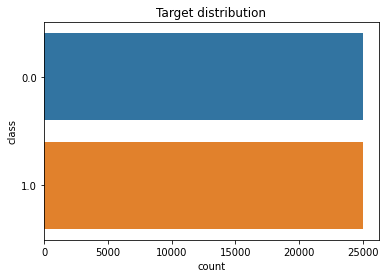

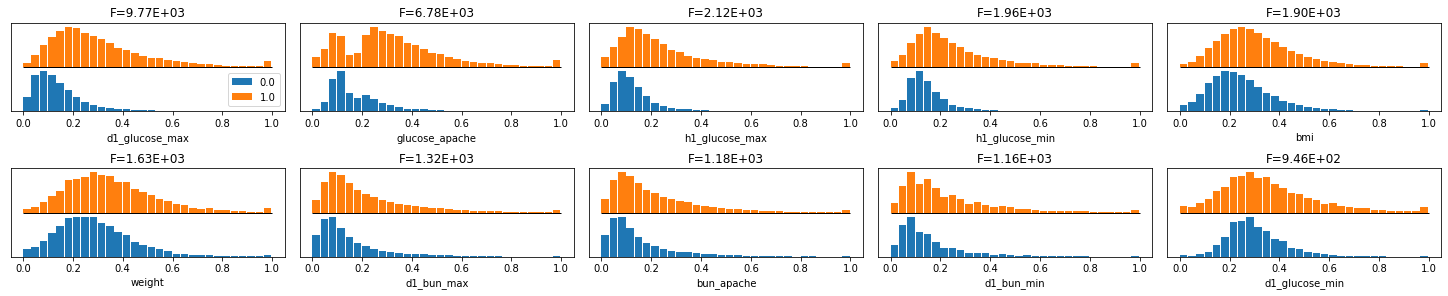

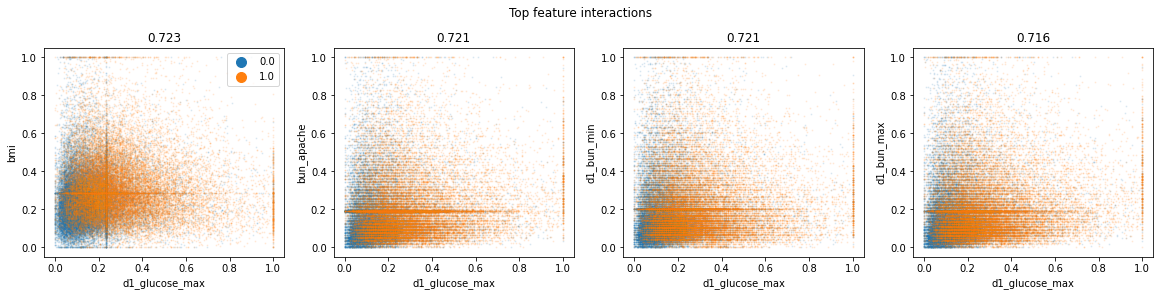

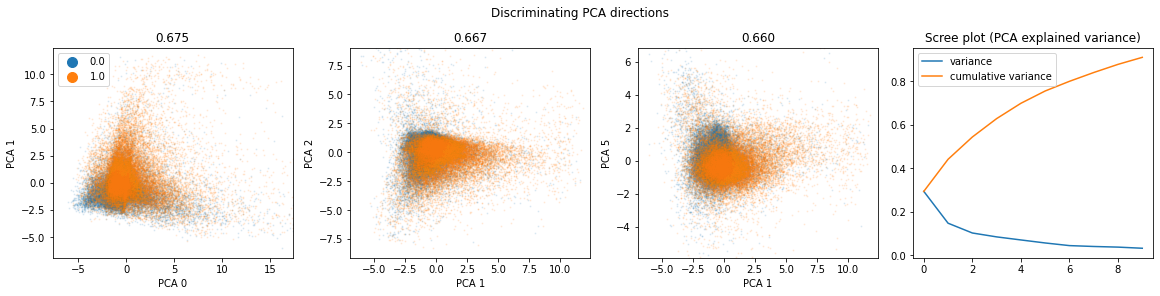

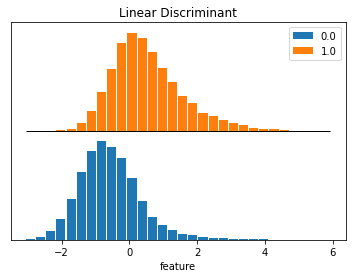

In [ ]:
dabl.plot(sample_5b,'diabetes_mellitus' )